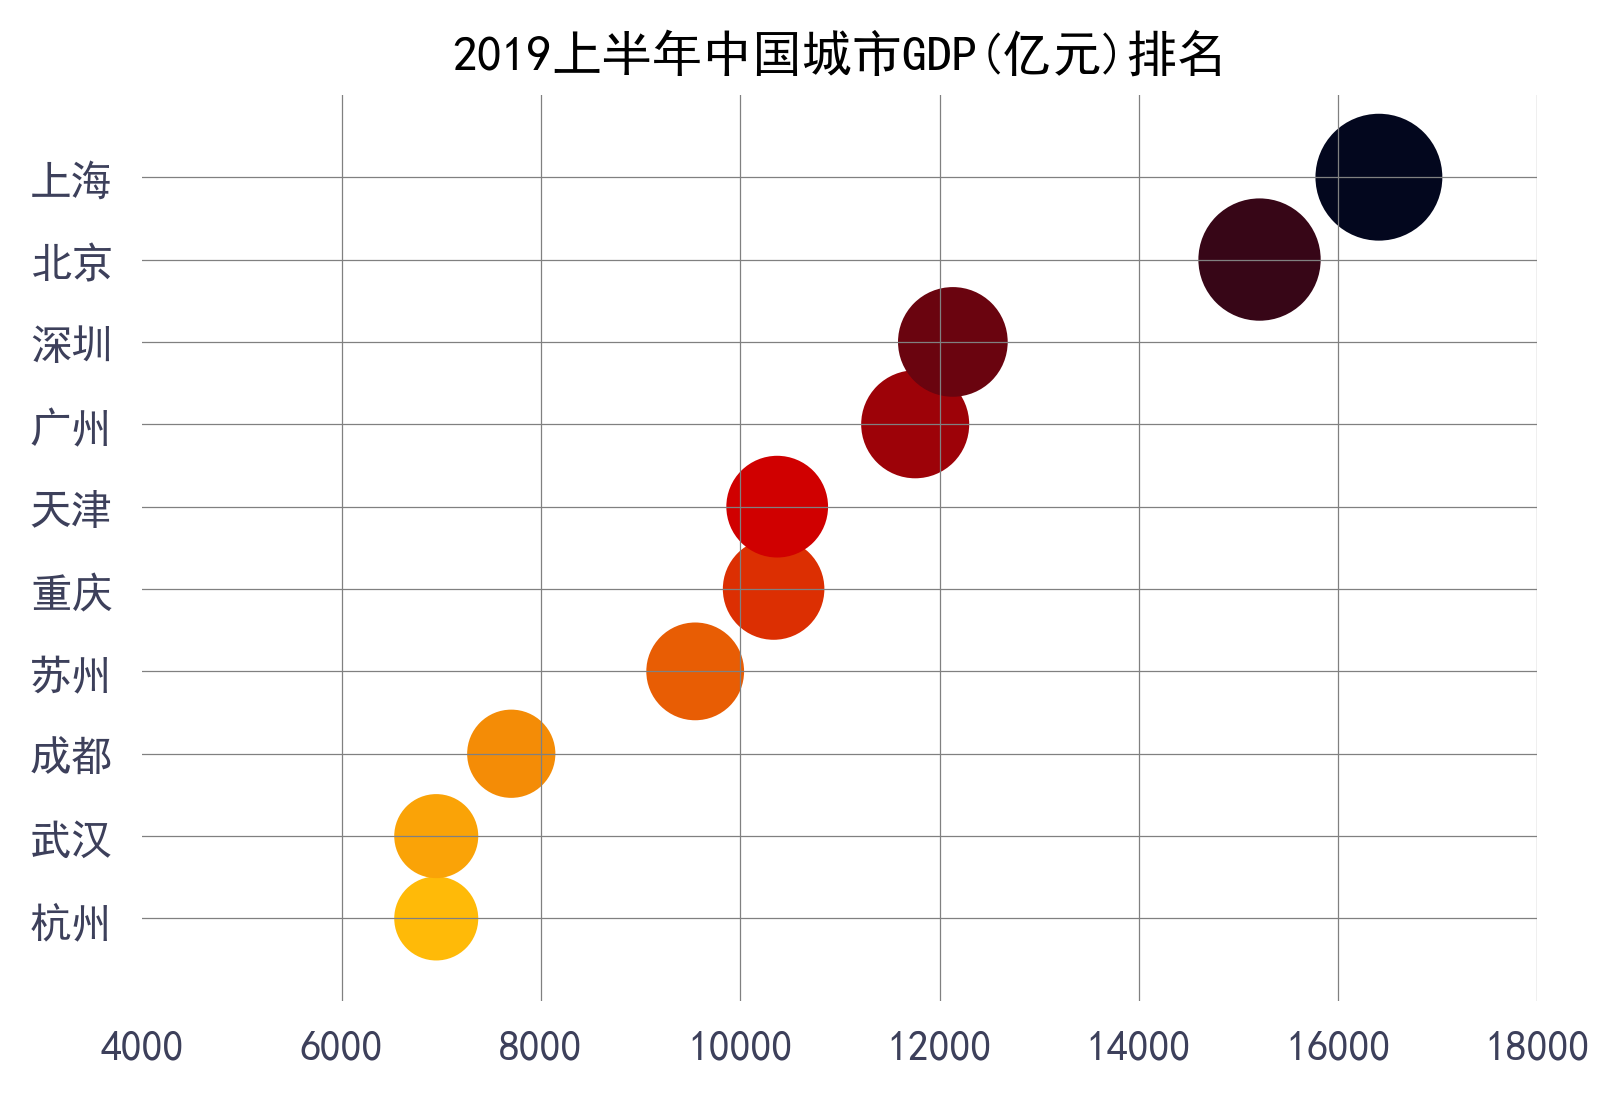

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为`a方块的问题

"""准备数据"""
data=pd.DataFrame(data={'rank':[10,9, 8, 7, 6, 5, 4, 3, 2, 1],
                        'city':['杭州','武汉', '成都', '苏州', '重庆', '天津', '广州', '深圳', '北京', '上海'],
                        'GDP':[6949,6949, 7702, 9548, 10335, 10371, 11756, 12134, 15212, 16410]})
#散点大小 ，由GDP数值归一化到0-500
data['size']=data['GDP']*500/(data['GDP'].max()-data['GDP'].min())

#圆点颜色值 rgb十六进制
data['color']=['#FFBA08', '#FAA307', '#F48C06', '#E85D04', '#DC2F02', '#D00000', '#9D0208', '#6A040F', '#370617', '#03071E']

#圆点Y值
data['Y']=10-data['rank']

#开始画图
fig,ax=plt.subplots(1,1,dpi=300)

#将刻度小横线设置为白色，标签颜色为深蓝色
plt.tick_params(axis='x',color='w',labelcolor='#3d405b')
plt.tick_params(axis='y',color='w',labelcolor='#3d405b')

#x,y轴刻度范围
ax.set_xlim(6000,18001)
ax.set_xticks(range(4000,19000,2000))

# y轴标签
ylabels=data['city'].tolist()
ax.set_ylim(-1,10)
ax.set_yticklabels(ylabels)

#画 x，y水平线，设置颜色，线类型，和线宽度
for i in range(6000,19000,2000):
    ax.axvline(x=i,c="gray",ls="-",lw=0.3)
for y in range(10):
    ax.axhline(y=y,c="gray",ls="-",lw=0.3)

#画散点图
ax.scatter('GDP', 'city', c='color', s='size', data=data)   #c : color  s :size  这里传入了序列

#隐藏上下左右外边框
for i in ['top','right','left','bottom']:
    ax.spines[i].set_visible(False)
plt.title("2019上半年中国城市GDP(亿元)排名")
plt.savefig("城市GDP.png")
plt.show()
plt.close()

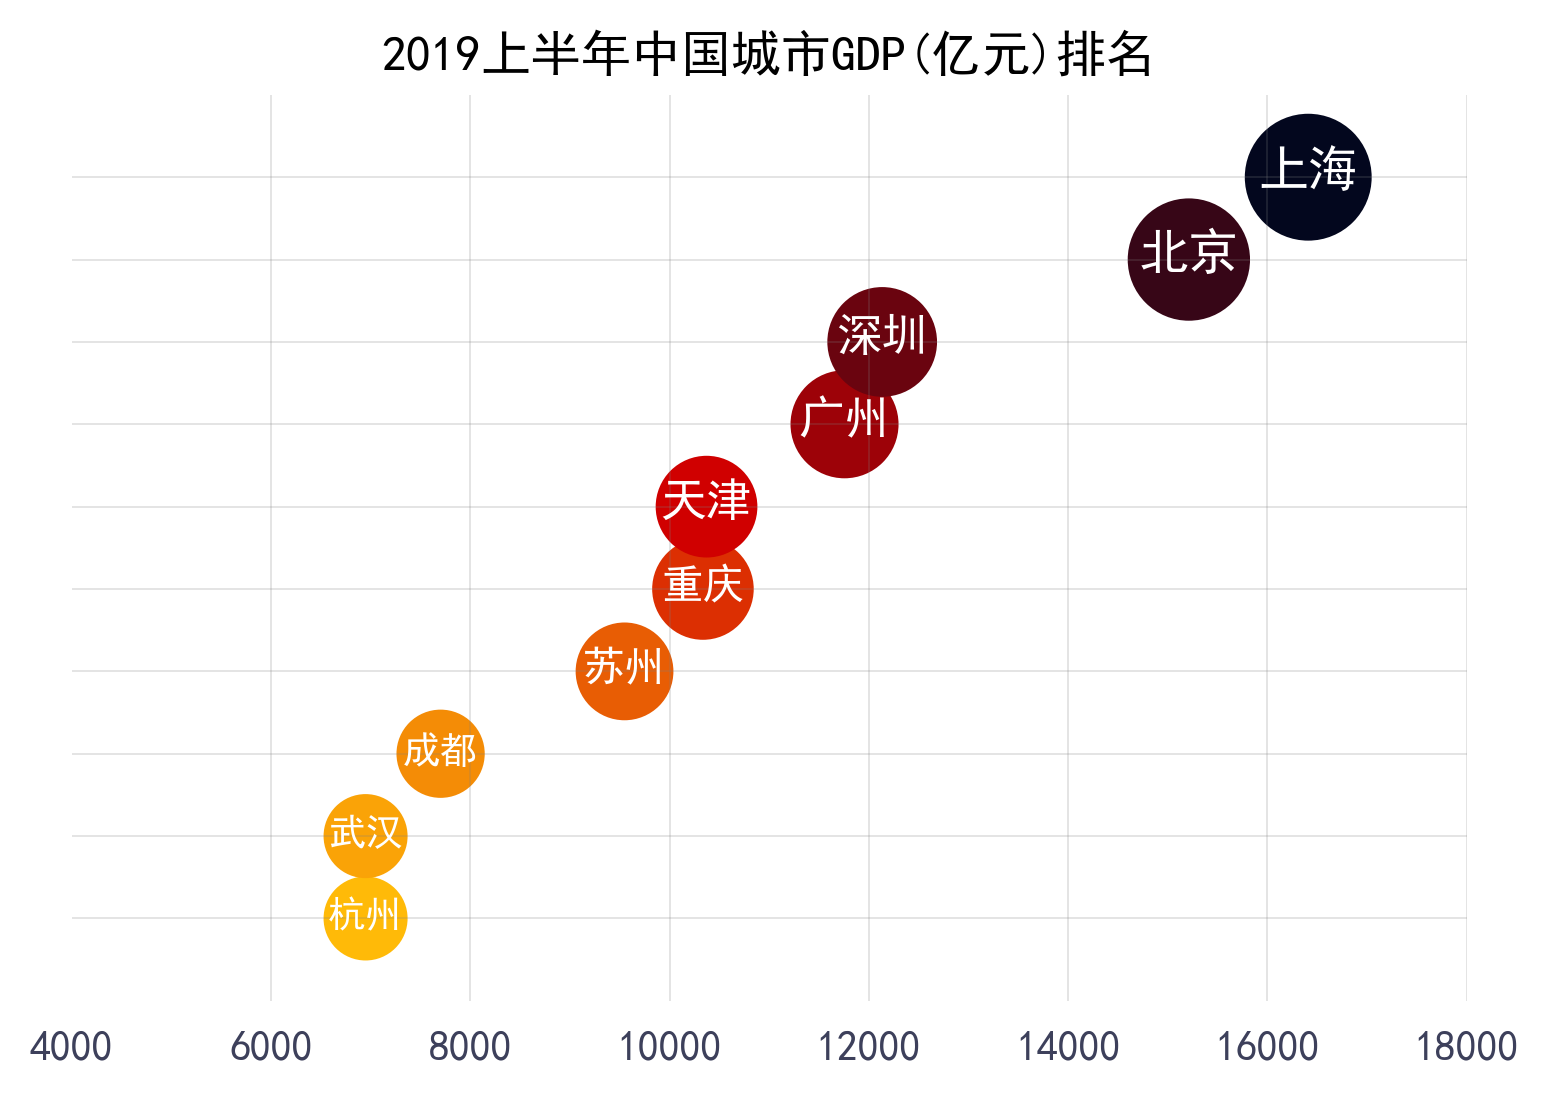

In [51]:
#圆点内文字大小设置
data['text_size']=[9,9,9,10,10,11,11,11,12,12]
fig,ax=plt.subplots(1,1,dpi=300)

#隐藏y轴
ax.get_yaxis().set_visible(False)

#将刻度小横线设置为白色，标签颜色为黑色
plt.tick_params(axis='x',color='w',labelcolor='#3d405b')

#x,y轴刻度范围
ax.set_xlim(6000,18001)
ax.set_xticks(range(4000,19000,2000))
ax.set_ylim(-1,10)

#画 x，y水平线，设置颜色，线类型，和线宽度
for i in range(6000,19000,2000):
    ax.axvline(x=i,c="gray",ls="-",lw=0.1)
for y in range(10):
    ax.axhline(y=y,c="gray",ls="-",lw=0.1)

#画散点图
ax.scatter('GDP', 'city', c='color', s='size', data=data)   #c : color  s :size  这里传入了序列

#圆点标签文字和面积大小设置
for rank,city in zip(data['rank'],data['city']):
    gdp=data[data['city']==city]['GDP']
    text_size=data[data['city']==city]['text_size']
    ax.text(gdp-500*text_size/12,10-rank-0.1,city,fontdict={'color':'w','size':text_size},fontweight='heavy')
for i in ['top','right','left','bottom']:
    ax.spines[i].set_visible(False)
plt.title("2019上半年中国城市GDP(亿元)排名")
plt.savefig("城市GDP2.png")
plt.show()